In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "gdrive/My Drive/Data/"

"""
!ls "gdrive/My Drive/Data/kaggle.json"
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp "gdrive/My Drive/Data/kaggle.json" ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
"""

'\n!ls "gdrive/My Drive/Data/kaggle.json"\n!pip install -q kaggle\n\n!mkdir -p ~/.kaggle\n!cp "gdrive/My Drive/Data/kaggle.json" ~/.kaggle/\n\n!chmod 600 ~/.kaggle/kaggle.json\n'

In [0]:
#! kaggle datasets list

In [0]:
#! kaggle competitions list

In [0]:
#!cd gdrive/My Drive/Data
#!kaggle competitions download -c "m5-forecasting-accuracy"

In [0]:
"""
!ls
!mv "sales_train_validation.csv.zip" "gdrive/My Drive/Data"
!mv "calendar.csv" "gdrive/My Drive/Data"
!mv "sample_submission.csv.zip" "gdrive/My Drive/Data"
!mv "sell_prices.csv.zip" "gdrive/My Drive/Data"
!mv "sample_data" "gdrive/My Drive/Data"
"""

'\n!ls\n!mv "sales_train_validation.csv.zip" "gdrive/My Drive/Data"\n!mv "calendar.csv" "gdrive/My Drive/Data"\n!mv "sample_submission.csv.zip" "gdrive/My Drive/Data"\n!mv "sell_prices.csv.zip" "gdrive/My Drive/Data"\n!mv "sample_data" "gdrive/My Drive/Data"\n'

In [0]:
#!ls "gdrive/My Drive/Data"
#!unzip "gdrive/My Drive/Data/sample_submission.csv.zip" "gdrive/My Drive/Data/sell_prices.csv.zip"
#!ls "gdrive/My Drive/Data"
#!ls 
#!unzip "gdrive/My Drive/Data/sales_train_validation.csv.zip" -d "gdrive/My Drive/Data"
#!unzip "gdrive/My Drive/Data/sell_prices.csv.zip" -d "gdrive/My Drive/Data"

In [0]:
#!ls 
#!unzip "gdrive/My Drive/Data/sales_train_validation.csv.zip" -d "gdrive/My Drive/Data"
#!unzip "gdrive/My Drive/Data/sell_prices.csv.zip" -d "gdrive/My Drive/Data"

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import sys
import time


path_sales = path + "sales_train_validation.csv"
path_cal = path + "calendar.csv"
path_sell = path + "sell_prices.csv"

In [0]:
sales_data = pd.read_csv(path_sales)
sales_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


In [0]:
sales_data["store_id"].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [0]:
list(sales_data["cat_id"].unique())

['HOBBIES', 'HOUSEHOLD', 'FOODS']

In [0]:
sell_data = pd.read_csv(path_sell)
sell_data[:]

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [0]:
sell_data.dtypes

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object

In [0]:
cal_data = pd.read_csv(path_cal)
cal_data

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [0]:
weekofday = {}
for i in range(1,1914):
  weekofday[str("d_")+str(i)] = np.float64

listofdays = list(sales_data.columns)[6:]

In [0]:
start_time = time.time()
store = "CA_2"
item_type = "HOUSEHOLD"
store_sales_data = sales_data[sales_data["store_id"] == store]
store_sales_data = store_sales_data[store_sales_data["cat_id"] == item_type]
print(time.time()-start_time)

0.02672290802001953


In [0]:
"""
a = []
b = 0
c = 0
temp3_sales_data = store_sales_data
temp2_sales_data = store_sales_data
for i in range(565): 
  item_name = store_sales_data["item_id"][i]
  temp_sell_data = store_sell_data[store_sell_data["item_id"] == item_name]
  temp2_sell_data = temp_sell_data
  for key in range(1,1914):
    sale = store_sales_data[str("d_")+str(key)][i]
    if sale!=0:
      #try:
    
      #ttt
      temp3_sales_data[str("d_")+str(key)][i] = (temp2_sales_data[str("d_")+str(key)][i]*temp_sell_data.loc[temp_sell_data["wm_yr_wk"] == cal_data["wm_yr_wk"][key],"sell_price"].iloc[0])
      b = b+1
      #except:
      #  print(i,item_name,key,cal_data["wm_yr_wk"][key])
      #  c = c+1
      #  #sys.exit()
 """     

'\na = []\nb = 0\nc = 0\ntemp3_sales_data = store_sales_data\ntemp2_sales_data = store_sales_data\nfor i in range(565): \n  item_name = store_sales_data["item_id"][i]\n  temp_sell_data = store_sell_data[store_sell_data["item_id"] == item_name]\n  temp2_sell_data = temp_sell_data\n  for key in range(1,1914):\n    sale = store_sales_data[str("d_")+str(key)][i]\n    if sale!=0:\n      #try:\n    \n      #ttt\n      temp3_sales_data[str("d_")+str(key)][i] = (temp2_sales_data[str("d_")+str(key)][i]*temp_sell_data.loc[temp_sell_data["wm_yr_wk"] == cal_data["wm_yr_wk"][key],"sell_price"].iloc[0])\n      b = b+1\n      #except:\n      #  print(i,item_name,key,cal_data["wm_yr_wk"][key])\n      #  c = c+1\n      #  #sys.exit()\n '

In [0]:
store_sell_data = sell_data[sell_data["store_id"] == "CA_3"]
store_sell_data[store_sell_data["item_id"] == "HOBBIES_1_001"]

,store_id,item_id,wm_yr_wk,sell_price
1335807,CA_3,HOBBIES_1_001,11326,8.26
1335808,CA_3,HOBBIES_1_001,11327,8.26
1335809,CA_3,HOBBIES_1_001,11328,8.26
1335810,CA_3,HOBBIES_1_001,11329,8.26
1335811,CA_3,HOBBIES_1_001,11330,8.26
...,...,...,...,...
1335955,CA_3,HOBBIES_1_001,11617,8.38
1335956,CA_3,HOBBIES_1_001,11618,8.38
1335957,CA_3,HOBBIES_1_001,11619,8.38
1335958,CA_3,HOBBIES_1_001,11620,8.38


In [0]:
"""
start_time = time.time()
store = "CA_3"
item_type = ""
store_sales_data = sales_data[sales_data["store_id"] == store]
store_sales_data = store_sales_data[store_sales_data["cat_id"] == item_type]
#print(time.time()-start_time)

rangeofind = list(store_sales_data.index.values)
#len(rangeofind)
"""

'\nstart_time = time.time()\nstore = "CA_3"\nitem_type = ""\nstore_sales_data = sales_data[sales_data["store_id"] == store]\nstore_sales_data = store_sales_data[store_sales_data["cat_id"] == item_type]\n#print(time.time()-start_time)\n\nrangeofind = list(store_sales_data.index.values)\n#len(rangeofind)\n'

In [0]:
revenue_caq = {}
count_caq = {}
revenue_caq['HOBBIES'] = []
revenue_caq['HOUSEHOLD'] = []
revenue_caq['FOODS'] = []
count_caq['HOBBIES'] = []
count_caq['HOUSEHOLD'] = []
count_caq['FOODS'] = []

In [0]:
for store in ['TX_2', 'TX_3', 'WI_1','WI_2', 'WI_3']:

  store_sell_data = sell_data[sell_data["store_id"] == store]

  revenue_caq['HOBBIES'] = []
  revenue_caq['HOUSEHOLD'] = []
  revenue_caq['FOODS'] = []
  count_caq['HOBBIES'] = []
  count_caq['HOUSEHOLD'] = []
  count_caq['FOODS'] = []

  for item_type in ['HOBBIES', 'HOUSEHOLD', 'FOODS']:
    print(item_type,store)
    start_time = time.time()

    store_sales_data = sales_data[sales_data["store_id"] == store]
    store_sales_data = store_sales_data[store_sales_data["cat_id"] == item_type]
    #print(time.time()-start_time)

    rangeofind = list(store_sales_data.index.values)
    #len(rangeofind)

    count_sales_data = store_sales_data.copy()
    rev_sales_data = store_sales_data.copy()
    temp2_sales_data = store_sales_data.copy()
    rev_sales_data = rev_sales_data.astype(weekofday)

    for i in rangeofind: 
      start_time = time.time()

      #a = time.time()
      item_name = store_sales_data["item_id"][i]
      temp_sell_data = store_sell_data[store_sell_data["item_id"] == item_name]
      temp2_sell_data = temp_sell_data
      #b = time.time()
      for key in range(1,1914):
        #rev_sales_data = rev_sales_data.astype(weekday)
        sale = store_sales_data[str("d_")+str(key)][i]
        if sale!=0:
          rev_sales_data[str("d_")+str(key)][i] = (temp2_sales_data[str("d_")+str(key)][i]*temp_sell_data.loc[temp_sell_data["wm_yr_wk"] == cal_data["wm_yr_wk"][key],"sell_price"].iloc[0])
          count_sales_data[str("d_")+str(key)][i] = 1
          #print(store_sales_data[str("d_")+str(key)][i],rev_sales_data[str("d_")+str(key)][i],count_sales_data[str("d_")+str(key)][i])
        else:
          count_sales_data[str("d_")+str(key)][i] = 0

      print(time.time()-start_time)

    figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

    revenue_caq[item_type] = list(rev_sales_data.sum())[6:]
    count_caq[item_type] = list(count_sales_data.sum())[6:]
    #snap_caq_ = cal_data["snap_CA"]

    plt.plot(revenue_caq[item_type])
    #plt.plot(snap_caq_foods*8000)

  _pf_ = pd.DataFrame(list(zip(revenue_caq['HOBBIES'],count_caq['HOBBIES'],revenue_caq['HOUSEHOLD'],count_caq['HOUSEHOLD'],revenue_caq['FOODS'],count_caq['FOODS'])), columns =['Hobbie_revenue','Hobbie_count', 'House_revenue','House_count','Foods_revenue','Foods_count'])
  _pf_.to_csv(r'gdrive/My Drive/Data/'+store+'_ext.csv',index = False)


In [0]:
store_sales_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
3049,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,1,2,0,0,1,1,3,0,0,3,1,0,1,1,0,2,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0,4,0,0,2,2
3050,HOBBIES_1_002_CA_2_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3051,HOBBIES_1_003_CA_2_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1,3,0,0,0,0,0,3,1,0,0,3,0,0,0,0,0,0,0,0,1,1,0,3,0,0,0,0,2,1,0
3052,HOBBIES_1_004_CA_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_2,CA,6,3,2,8,2,3,9,6,6,3,3,2,2,2,5,12,0,5,2,3,2,16,8,0,0,0,0,0,5,15,8,8,0,0,...,6,1,3,0,0,0,8,4,1,7,0,11,3,2,5,2,1,3,3,2,0,1,4,10,3,3,2,4,2,4,1,2,1,2,4,3,0,3,3,1
3053,HOBBIES_1_005_CA_2_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,3,3,1,1,2,1,4,0,2,2,2,1,3,2,6,1,2,0,1,2,3,1,2,0,1,0,0,2,0,0,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,HOBBIES_2_145_CA_2_validation,HOBBIES_2_145,HOBBIES_2,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3610,HOBBIES_2_146_CA_2_validation,HOBBIES_2_146,HOBBIES_2,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3611,HOBBIES_2_147_CA_2_validation,HOBBIES_2_147,HOBBIES_2,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,3,3,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3612,HOBBIES_2_148_CA_2_validation,HOBBIES_2_148,HOBBIES_2,HOBBIES,CA_2,CA,0,0,0,1,0,1,1,0,0,0,0,3,1,0,0,3,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0


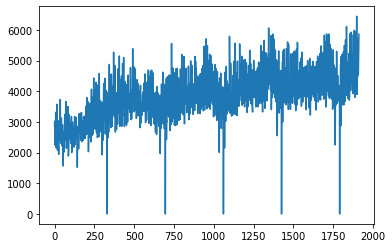

In [0]:
plt.plot(list(rev_sales_data.sum())[6:])

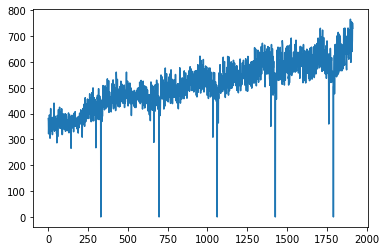

In [0]:
plt.plot(list(count_sales_data.sum())[6:])

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

revenue_ca4_foods = list(rev_sales_data.sum())[6:]
count_ca4_foods = list(count_sales_data.sum())[6:]
snap_ca4_foods = cal_data["snap_CA"]

plt.plot(revenue_ca4_foods)
plt.plot(snap_ca4_foods*8000)

#plt.plot(list(zip(list(temp3_sales_data.sum())[6:], list(cal_data["snap_CA"]))))
#plt.plot(list(temp3_sales_data.sum())[6:])

NameError: ignored

<Figure size 2400x480 with 0 Axes>

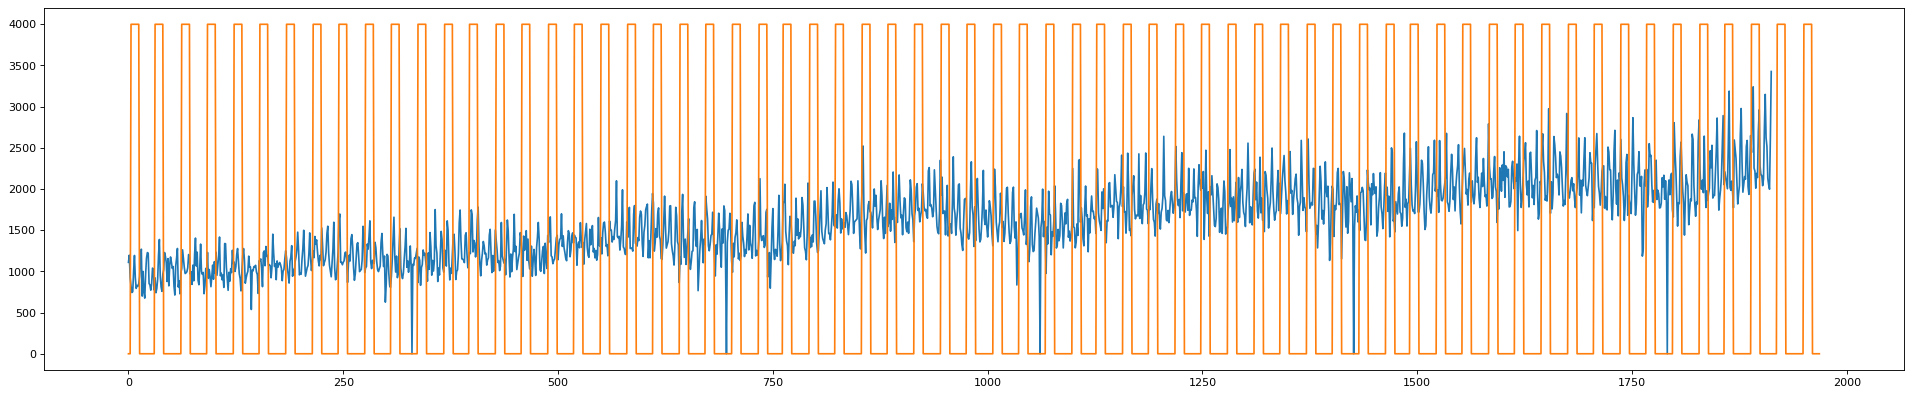

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca4_house)
plt.plot(snap_ca4_house*4000)

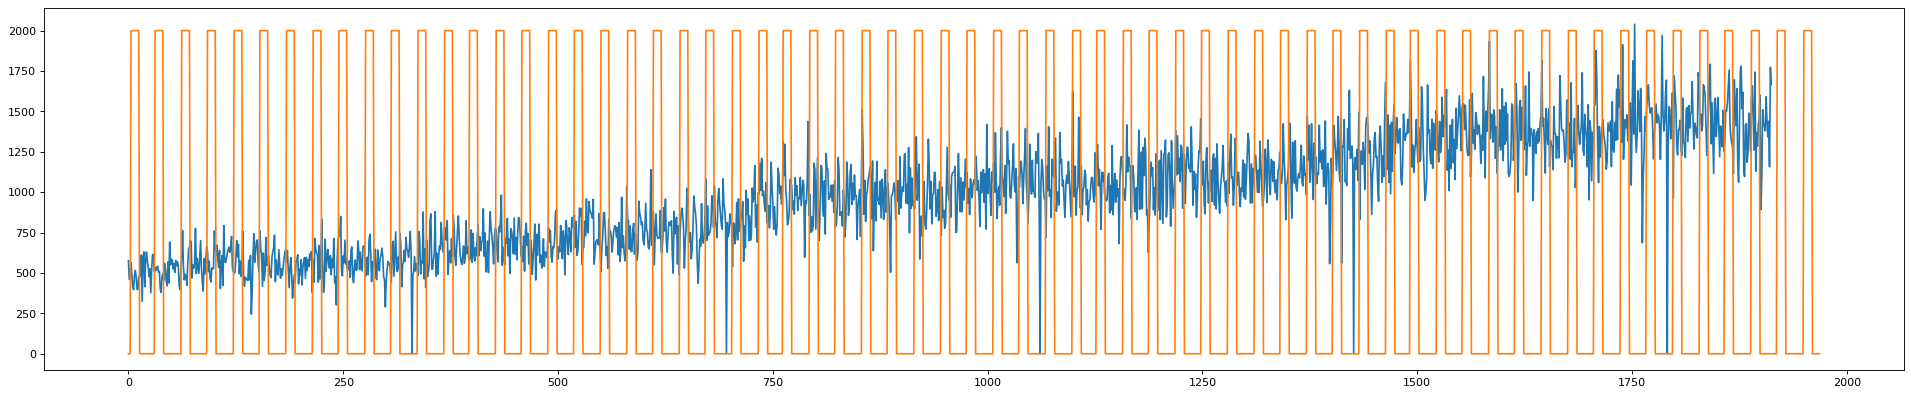

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca4_hob)
plt.plot(snap_ca4_hob*2000)

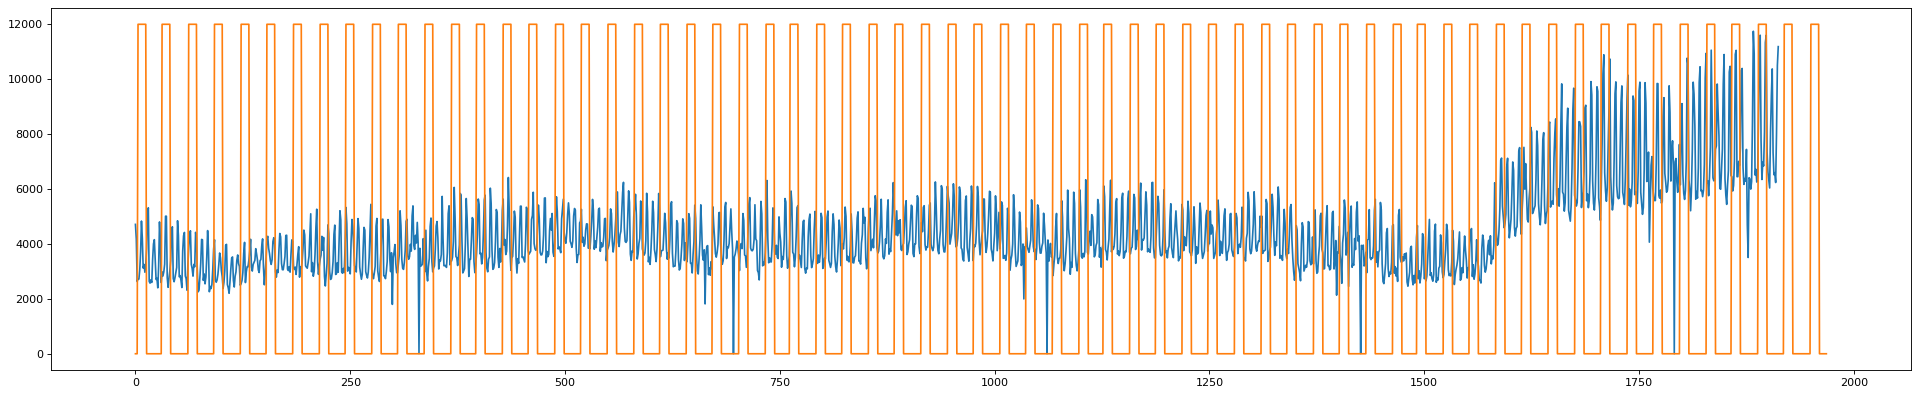

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca2_foods)
plt.plot(snap_ca2_foods*12000)

#plt.plot(list(zip(list(temp3_sales_data.sum())[6:], list(cal_data["snap_CA"]))))
#plt.plot(list(temp3_sales_data.sum())[6:])

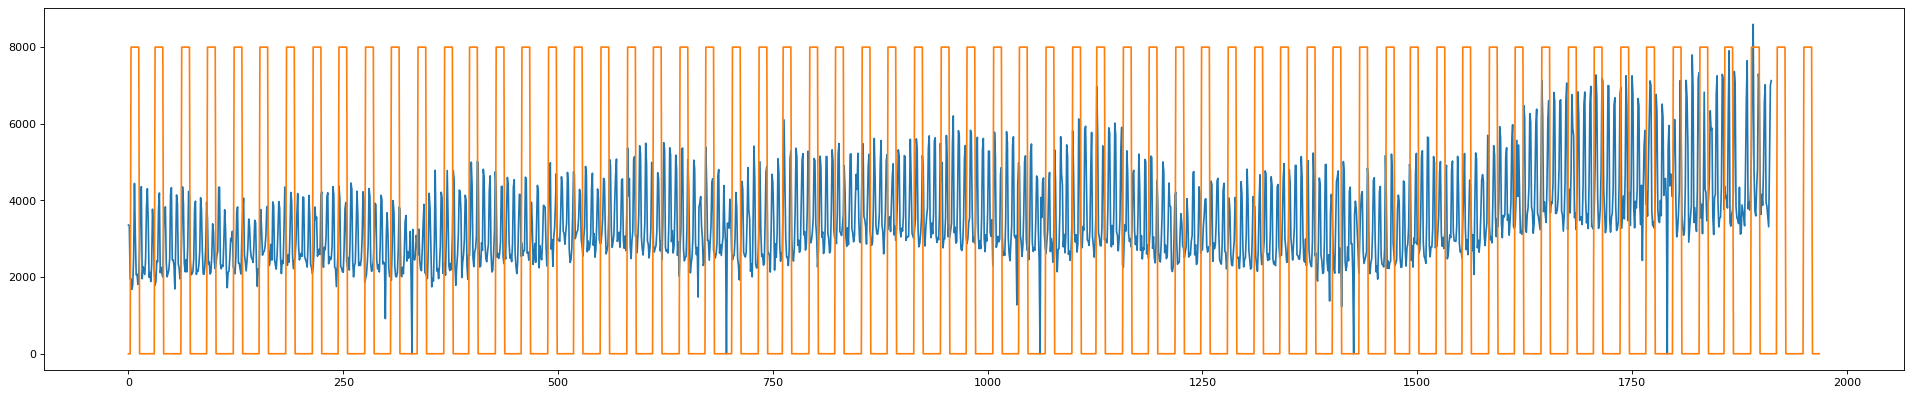

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca2_house)
plt.plot(snap_ca2_house*8000)

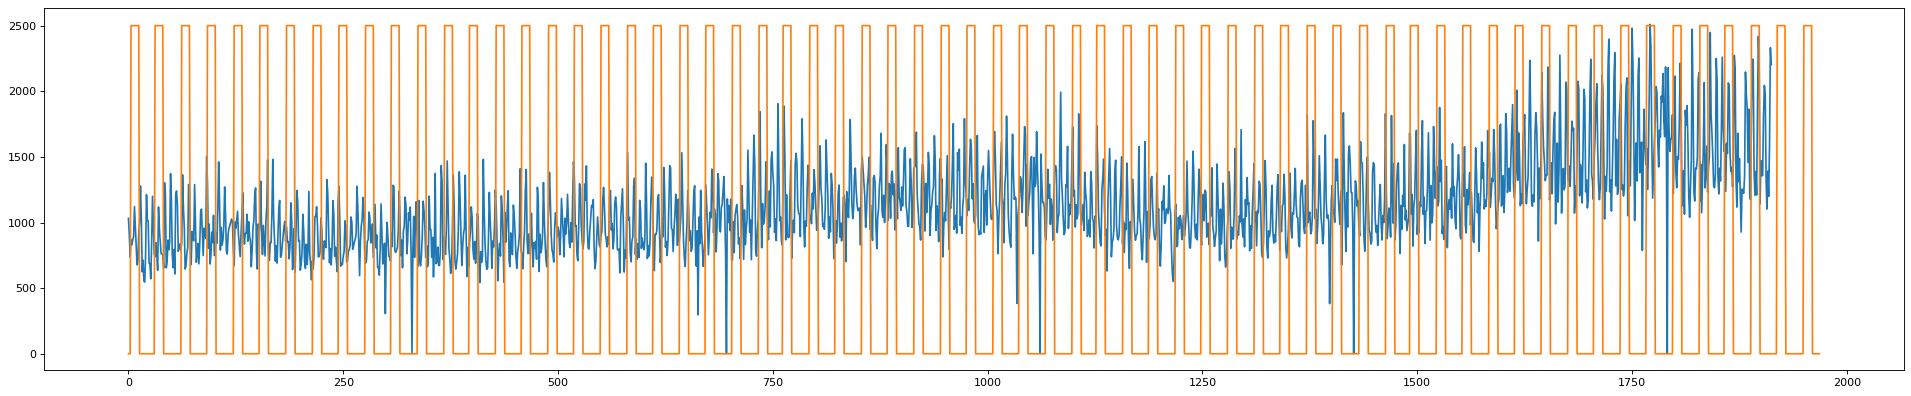

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca2_hob)
plt.plot(snap_ca2_hob*2500)

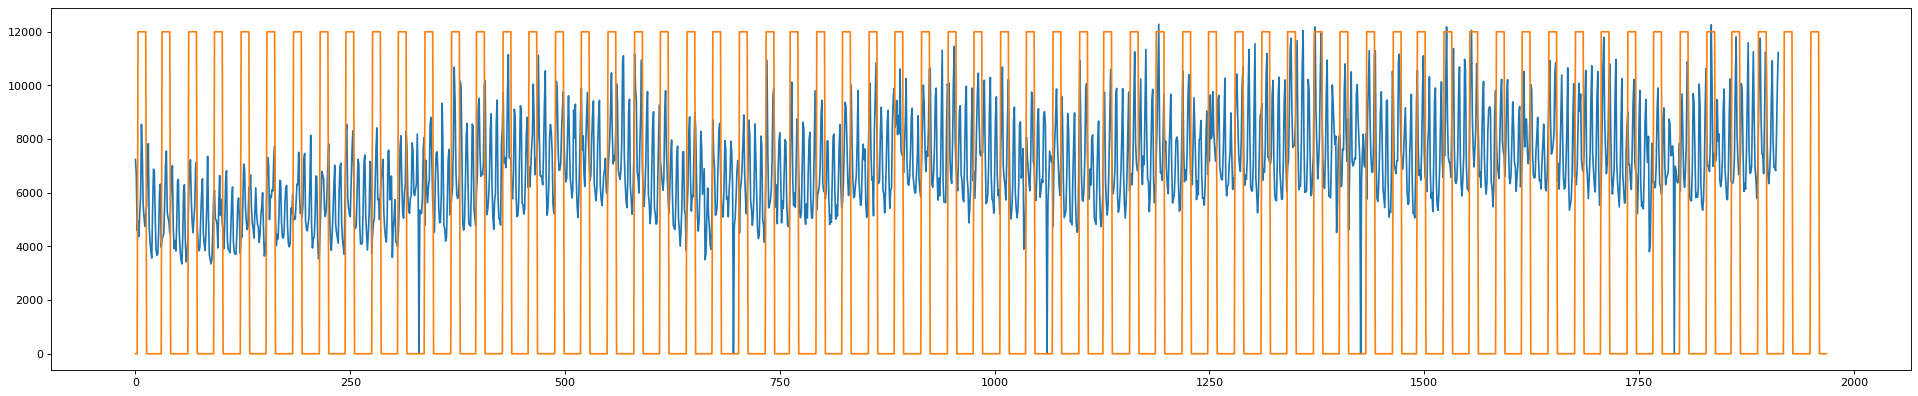

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca1_foods)
plt.plot(snap_ca1_foods*12000)

#plt.plot(list(zip(list(temp3_sales_data.sum())[6:], list(cal_data["snap_CA"]))))
#plt.plot(list(temp3_sales_data.sum())[6:])

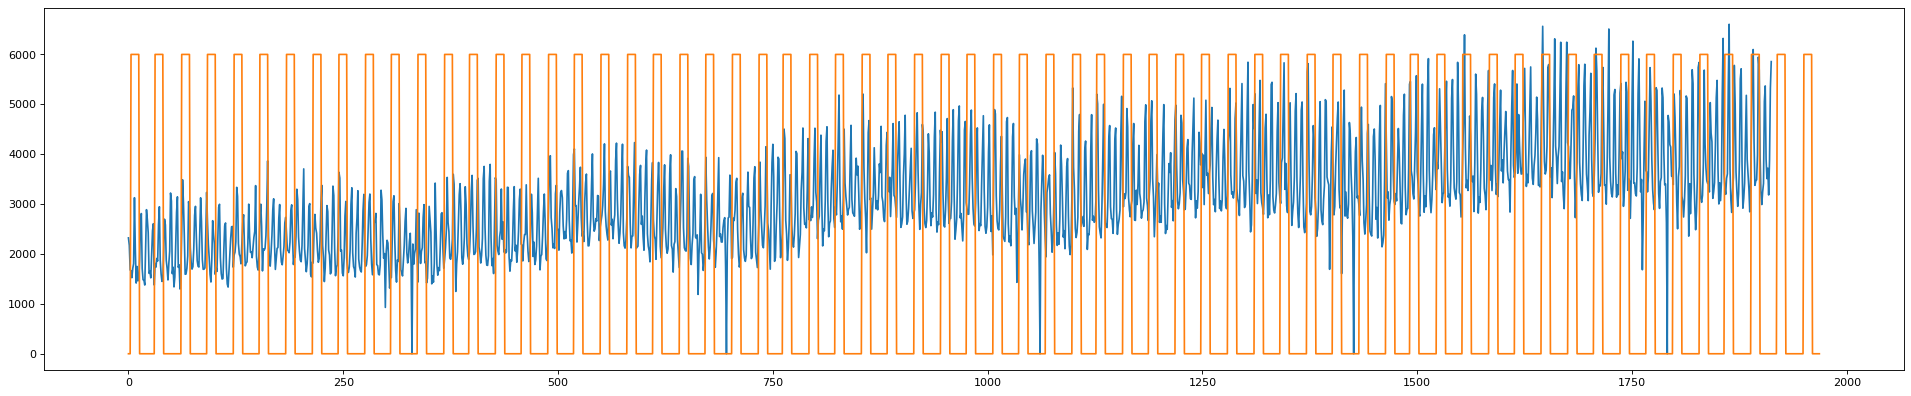

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca1_house)
plt.plot(snap_ca1_house*6000)

#plt.plot(list(zip(list(temp3_sales_data.sum())[6:], list(cal_data["snap_CA"]))))
#plt.plot(list(temp3_sales_data.sum())[6:])

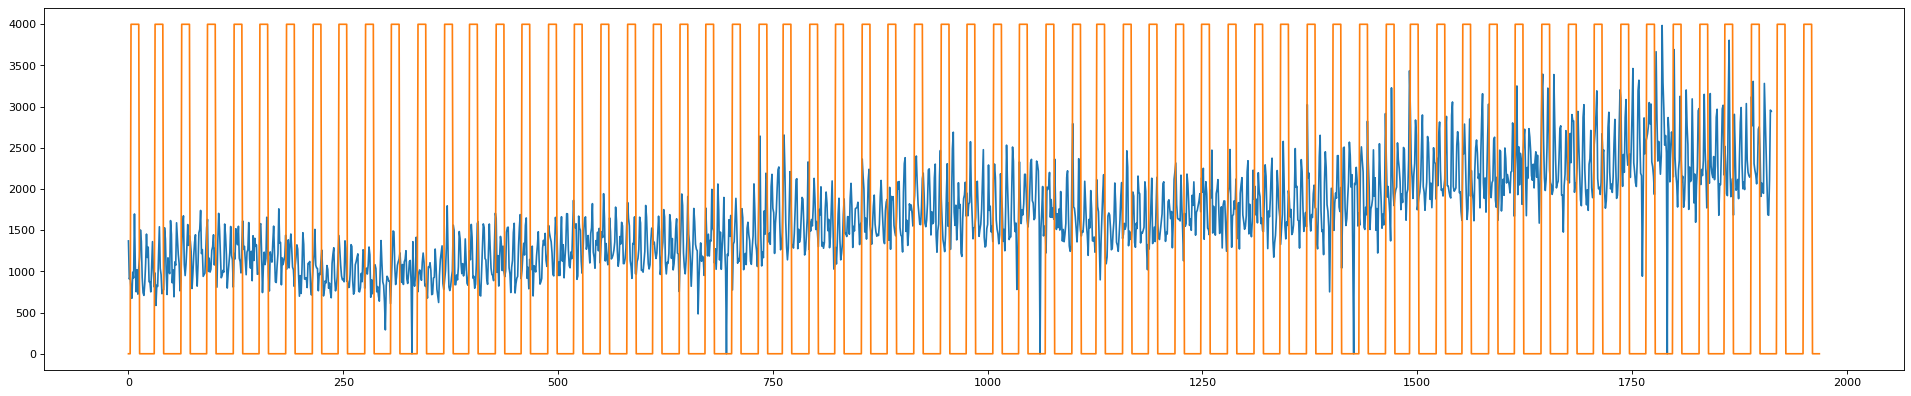

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(revenue_ca1_hob)
plt.plot(snap_ca1_hob*4000)

In [0]:
df = pd.DataFrame(list(zip(revenue_ca1_hob, revenue_ca1_house ,revenue_ca1_foods)), columns =['Hobbie', 'House','Foods'])

In [0]:
df.to_csv(r'gdrive/My Drive/Data/CA1.csv',index = False)

In [0]:
df1 = pd.read_csv("gdrive/My Drive/Data/CA1.csv")

In [0]:
df2 = pd.DataFrame(list(zip(revenue_ca2_hob, revenue_ca2_house ,revenue_ca2_foods)), columns =['Hobbie', 'House','Foods'])

In [0]:
plt.plot(cal_data["snap_CA"])

In [0]:
df2.to_csv(r'gdrive/My Drive/Data/CA2.csv',index = False)

In [0]:
df4 = pd.DataFrame(list(zip(revenue_ca4_hob, revenue_ca4_house ,revenue_ca4_foods)), columns =['Hobbie', 'House','Foods'])

In [0]:
df4.to_csv(r'gdrive/My Drive/Data/CA4.csv',index = False)

In [0]:
item_name = store_sales_data["item_id"][1]
temp_sell_data = store_sell_data[store_sell_data["item_id"] == item_name]
type(temp_sell_data)
a = temp_sell_data.loc[temp_sell_data["wm_yr_wk"] == 11325,"sell_price"]
type(a)
a.iloc[0]

In [0]:
pf1 = pd.DataFrame(list(zip(revenue_ca1_hob,count_ca1_hob,revenue_ca1_house,count_ca1_house,revenue_ca1_foods,count_ca1_foods)), columns =['Hobbie_revenue','Hobbie_count', 'House_revenue','House_count','Foods_revenue','Foods_count'])
pf1.to_csv(r'gdrive/My Drive/Data/CA1_ext.csv',index = False)

In [0]:
pf2 = pd.DataFrame(list(zip(revenue_ca2_hob,count_ca2_hob,revenue_ca2_house,count_ca2_house,revenue_ca2_foods,count_ca2_foods)), columns =['Hobbie_revenue','Hobbie_count', 'House_revenue','House_count','Foods_revenue','Foods_count'])
pf2.to_csv(r'gdrive/My Drive/Data/CA2_ext.csv',index = False)

In [0]:
pf4 = pd.DataFrame(list(zip(revenue_ca4_hob,count_ca4_hob,revenue_ca4_house,count_ca4_house,revenue_ca4_foods,count_ca4_foods)), columns =['Hobbie_revenue','Hobbie_count', 'House_revenue','House_count','Foods_revenue','Foods_count'])
pf4.to_csv(r'gdrive/My Drive/Data/CA4_ext.csv',index = False)

In [0]:
!ls "gdrive/My Drive/Data"

 CA1.csv       CA4_ext.csv		    sample_data
 CA1_ext.csv   calendar.csv		    sample_submission.csv.zip
 CA2.csv       kaggle.json		    sell_prices.csv
 CA4.csv       sales_train_validation.csv  'Test_Pandas (1).xlsx'


In [0]:
sales_data.columns

In [0]:
sales_data["cat_id"].unique()

In [0]:
store_sell_data = sell_data[sell_data["store_id"] == "CA_1"]
store_sell_data[store_sell_data["item_id"] == "HOBBIES_2_149"]
#temp_data = sell_data[sell_data["item_id"] == cal_data.loc(cal_data["d"] == date,"")]sell_data.loc[sell_data["	wm_yr_wk"] == ,'b']

In [0]:
plt.plot(cal_data["wm_yr_wk"])
cal_data[360:400]

In [0]:
for i in range(1969):
  print(cal_data["wm_yr_wk"][i]*7 - i)

In [0]:
event_names = list(set(cal_data["event_name_1"].unique()).union(set(cal_data["event_name_2"].unique())))
event_names.remove(np.nan)
event_names.sort()
event_names

In [0]:
item_list = sales_data["item_id"].unique()
store_list = sales_data["store_id"].unique()
day_list = list(sales_data.columns[6:])

In [0]:
for item in item_list:
  for store in store_list:
      print(sales_data[sales_data.item_id == item][sales_data.store_id == store].reset_index())
      break
  print(item)
  break

In [0]:
list(sales_data.columns[6:])